# Exercise 1: Linear Regression

> In this exercise, you will implement linear regression and get to see it work on data.

## 1. Linear Regression with One Variable

> In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression prob- lem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

### 1.1 Plotting the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ex1data1.txt', sep=',', header=None)
df.columns = ['population', 'profit']

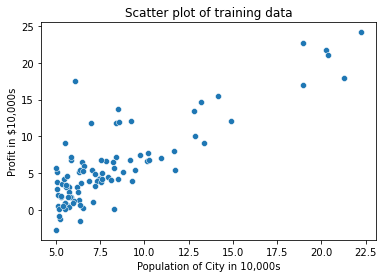

In [3]:
ax = sns.scatterplot(x='population', y='profit', data=df)
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Scatter plot of training data');

The plot shows that they have a linear relationship.

### 1.2 Gradient Descent

Fit the linear regression parameters $\theta$ to the dataset using gradient descent

#### 1.2.1 Update Equations

The hypothesis of linear regression is:

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

The objective of linear regression is to minimize the cost function (Root Mean Square Error RMSE):

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$

To minimize the cost of $J(\theta)$ we will use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

(simultaneously update $\theta_j$ for all $j$). With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

#### 1.2.2 Implementation

The need to add another dimension to our data to accommodate the $\theta_0$ intercept term. This allows us to treat $\theta_0$ as simply another feature.

In [4]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)), df.population.values.reshape(-1,1)))
y = np.array(df.profit.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

iterations = 1500
alpha = 0.01

#### 1.2.3 Computing the Cost $J(\theta)$

In [5]:
def compute_cost_one_variable(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [6]:
J = compute_cost_one_variable(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)
print('Expected cost value (approx) 32.07')

With theta = [0 ; 0]
Cost computed = 32.072733877455676
Expected cost value (approx) 32.07


In [7]:
J = compute_cost_one_variable(X, y, [[-1],[2]])
print('With theta = [-1 ; 2]\nCost computed =', J)
print('Expected cost value (approx) 54.24')

With theta = [-1 ; 2]
Cost computed = 54.24245508201238
Expected cost value (approx) 54.24


#### 1.2.4 Gradient Descent
Gradient descent is a generic optimization algorithm that measures the local gradient of the cost function with regards to the parameter $\theta$ and goes in the direction of descending gradient.

Algorithm:

repeat until convergence:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

where $j=0,1$; $\alpha$ is the learning rate (the steps to update J); $\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$ is a derivative.

* Learning rate to small: slow gradient descent
* Learning rate to large: gradient descent can overshoot the minimum, may fail to converge

In [8]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost_one_variable(X, y, theta)

    return theta, J_history

In [9]:
theta, _ = gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta)
print('Expected theta values (approx)\n -3.6303\n  1.1664')

Theta found by gradient descent:
 [[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)
 -3.6303
  1.1664


#### Plot the linear fit:

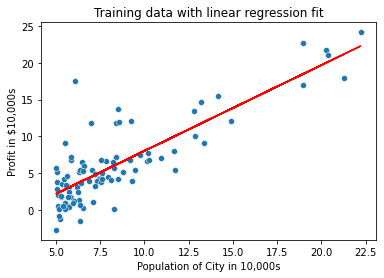

In [10]:
ax = sns.scatterplot(x='population', y='profit', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Training data with linear regression fit');

In [11]:
y_pred = np.array([1, 3.5]).dot(theta)
f'For population = 35,000, we predict a profit of {y_pred[0]*10000}'

'For population = 35,000, we predict a profit of 4519.7678677017675'

In [12]:
y_pred = np.array([1, 7]).dot(theta)
f'For population = 70,000, we predict a profit of {y_pred[0]*10000}'

'For population = 70,000, we predict a profit of 45342.45012944712'

### 1.3 Visualizing $J(\theta)$

The cost function $J(\theta)$ is bowl-shaped and has a global mininum. This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

In [13]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [14]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [15]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

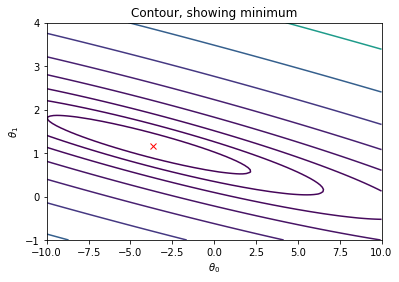

In [16]:
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2,3,20))
plt.plot(theta[0,0], theta[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');

### 1.4 Equivalent Code using Scikit-Learn

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df.population.values.reshape(-1,1), 
            df.profit.values.reshape(-1,1))

LinearRegression()

In [18]:
lin_reg.intercept_, lin_reg.coef_

(array([-3.89578088]), array([[1.19303364]]))

## 2. Linear Regression with Multiple Variables

> In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.
The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

### 2.1 Feature Normalization

In [20]:
df2 = pd.read_csv('ex1data2.txt', sep=',', header=None)
df2.columns = ['house_size', 'bedrooms', 'house_price']
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
house_size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
house_price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


> By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

We can speed up gradient descent by having each of our input values in roughly the same range, ideally $-1 \leq x_i \leq1$ or $-0.5 \leq x_i \leq0.5$.

* Feature scaling: involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable
* Mean normalization: involves subtracting the average value for an input variable from the values for that input variable

$x_i := \frac{x_i - \mu_i}{s_i}$, wher $\mu_i$ is the average of all the values for features (i) and $s_i$ is the range of values (max-min), the standard deviation.

In [21]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [22]:
X_norm, mu, sigma = feature_normalize(df2[['house_size', 'bedrooms']])

In [23]:
df2['house_size_normalized'] = X_norm[:,0]
df2['bedrooms_normalized'] = X_norm[:,1]
df2[['house_size_normalized', 'bedrooms_normalized']].describe().T

,count,mean,std,min,25%,50%,75%,max
house_size_normalized,47.0,1.889741e-17,1.0,-1.445423,-0.715590,-0.141790,0.337635,3.117292
bedrooms_normalized,47.0,2.651543e-16,1.0,-2.851859,-0.223675,-0.223675,1.090417,2.404508


### 2.2 Gradient Descent

The only difference from univariate regression problem is that now there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.

Note: In the multivariate case, the cost function can also be written in the following vectorized form:

$$J(\theta) = \frac{1}{2m}(X\theta-y)^T(X\theta-y)$$

In [24]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [25]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

#### 2.2.1 Selecting Learning Rates

Tips:
* Make a plot with number of iterations on the x-axis. Now plot the cost function, $J(\theta)$ over the number of iterations of gradient descent. If $J(\theta)$  ever increases, then you probably need to decrease $\alpha$.
* Declare convergence if $J(\theta)$ decreases by less than E in one iteration, where E is some small value such as $10^{−3}$.

In [26]:
m = df2.shape[0]
X = np.hstack((np.ones((m,1)),X_norm))
y = np.array(df2.house_price.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

In [27]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

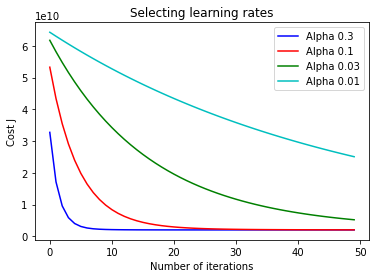

In [28]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [29]:
iterations = 250
alpha = 0.1
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[340412.65957372]
 [110630.26530813]
 [ -6648.6893001 ]]


##### Estimate the price of a 1650 sq-ft, 3 bedrooms house

In [30]:
sqft = (1650 - mu[0])/sigma[0]
bedrooms = (3 - mu[1])/sigma[1]
y_pred = theta[0] + theta[1]*sqft + theta[2]*bedrooms
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'

'Price of a house with 1650 square feet and 3 bedrooms: 293081.63514221634$'

### 2.3 Normal Equations

A closed-form solution to find $\theta$ without iteration.

$$\theta = (X^TX)^{-1}X^Ty$$

In [31]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [32]:
Xe = np.hstack((np.ones((m,1)),df2[['house_size', 'bedrooms']].values))
theta_e = normal_eqn(Xe, y)
theta_e

array([[89597.90954355],
       [  139.21067402],
       [-8738.01911255]])

In [33]:
y_pred = theta_e[0] + theta_e[1]*1650 + theta_e[2]*3
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'

'Price of a house with 1650 square feet and 3 bedrooms: 293081.4643349715$'

### 2.4 Equivalent Code using Scikit-Learn

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_norm, y)

LinearRegression()

In [35]:
lin_reg.intercept_, lin_reg.coef_

(array([340412.65957447]), array([[110631.05027885,  -6649.47427082]]))